# Sistema de recomendação - SVD

In [ ]:
%pip install surprise

In [13]:
# Importando bibliotecas
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, cross_validate
from surprise.prediction_algorithms.baseline_only import BaselineOnly
import matplotlib.pyplot as plt

In [9]:
# Carregar dados
reader = Reader(line_format="user item rating", sep=',', skip_lines=1)
data = Dataset.load_from_file('../../datasets/ratings.csv', reader=reader)

In [10]:
# Dividir em treino e teste
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
# Modelo SVD
svd = SVD()
svd.fit(train)
predictions = svd.test(test)
print("SVD - RMSE:", accuracy.rmse(predictions))

RMSE: 1.5455
SVD - RMSE: 1.5455310578060804


In [12]:
#Modelo Colaborativo Simples
baseline = BaselineOnly()
baseline.fit(train)
predictions_base = baseline.test(test)
print("Baseline - RMSE:", accuracy.rmse(predictions_base))

Estimating biases using als...
RMSE: 1.4915
Baseline - RMSE: 1.4914564619788335


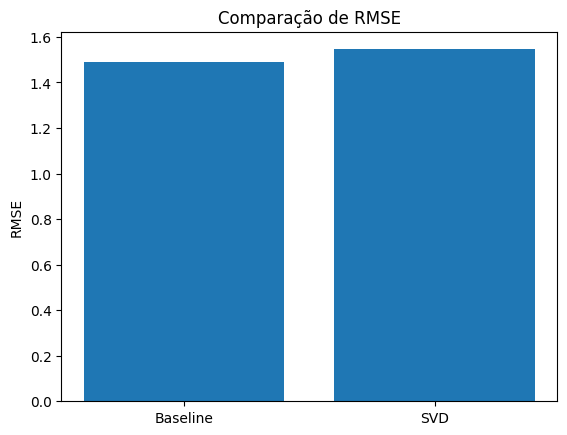

In [14]:
# Visualização
erros = [accuracy.rmse(predictions_base, verbose=False), accuracy.rmse(predictions, verbose=False)]
labels = ['Baseline', 'SVD']

plt.bar(labels, erros)
plt.title("Comparação de RMSE")
plt.ylabel('RMSE')
plt.show()